# Constrained Sampling

The importance of using specialized proposal distributions for constrained sample problems can be illustrated 
with a simple example.
Consider a box $[0, 1e5]^d$ for some dimension $d$ and assume the sampler starts close to the origin. 
In this case, a classical isotropical Gaussian proposal distribution will have approximately $\frac{2^d - 1}{2^d}$ of 
its density located outside the constrained region.
Thus, the probability to generate a proposal which lies inside the constrained region is geometrically
distributed and has probability $2^{-d}$.
It is easy to see, that this probability will vanish very quickly, hence, leaving the Markov chain stuck for 
a long time.
More precisely, it will remain stuck for $2^d$ moves in expectation.
In contrast, the Hit-and-Run algorithm will never generate samples outside the constrained region.
The effect of this can be seen by monitoring the proposed states of a Gaussian and a Hit-and-Run algorithm
for the same problem as dimension increases.

In [1]:
import hopsy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dims = np.array(range(1, 14))
Problem = lambda dim: hopsy.add_box_constraints(
    hopsy.Problem(-np.identity(dim), [0]*dim), 0, 1e3)

proposals = [
    hopsy.GaussianHitAndRunProposal,
    hopsy.GaussianProposal,
]

accrates = np.zeros((len(dims), len(proposals)))

n = 1000

for i, dim in enumerate(dims):
    for k, Proposal in enumerate(proposals):
        problem = Problem(dim)
        proposal = Proposal(problem, starting_point=[.001]*dim)
        rng = hopsy.RandomNumberGenerator(seed=42)
        accrate = 0

        for _ in range(n):
            state = proposal.propose(rng)
            accrate += 1 if (problem.A @ state <= problem.b).all() else 0

        accrates[i, k] = 1.*accrate / n


Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-30


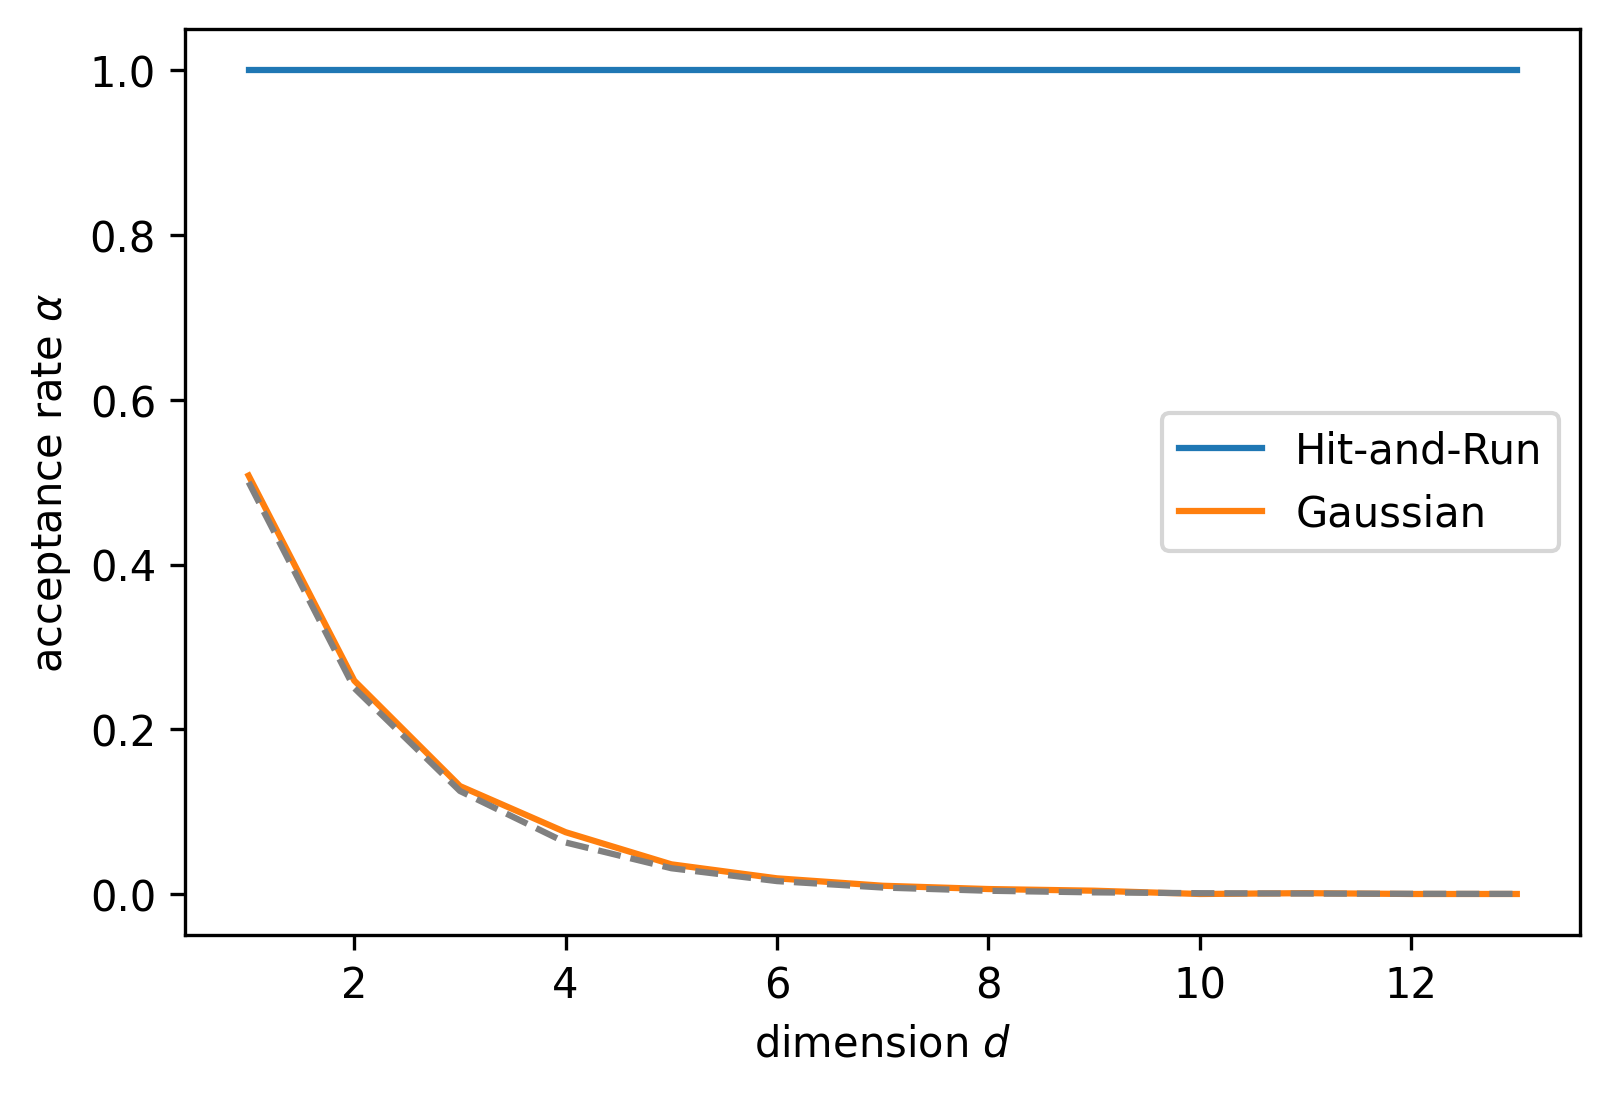

In [3]:
analytical = 1./2**dims

plt.figure(dpi=300)
plt.plot(dims, accrates, label=['Hit-and-Run', 'Gaussian'])
plt.plot(dims, analytical, linestyle='dashed', color='gray')

plt.xlabel(r'dimension $d$')
plt.ylabel(r'acceptance rate $\alpha$')

plt.legend()

plt.show()

In [4]:
dims = np.array(range(1, 14))
Problem = lambda dim: hopsy.add_box_constraints(
    hopsy.Problem(-np.identity(dim), [0]*dim, hopsy.Gaussian(mean=[0]*dim)), 0, 1e3)

proposals = [
    hopsy.GaussianHitAndRunProposal,
    hopsy.GaussianProposal,
]

accrates = np.zeros((len(dims), len(proposals)))

for i, dim in enumerate(dims):
    for k, Proposal in enumerate(proposals):
        problem = Problem(dim)
        mc = hopsy.MarkovChain(problem, Proposal, starting_point=[.001]*dim)
        rng = hopsy.RandomNumberGenerator(seed=42)

        accrate, _ = hopsy.sample(mc, rng, 10*2**dim)

        accrates[i, k] = accrate[0]


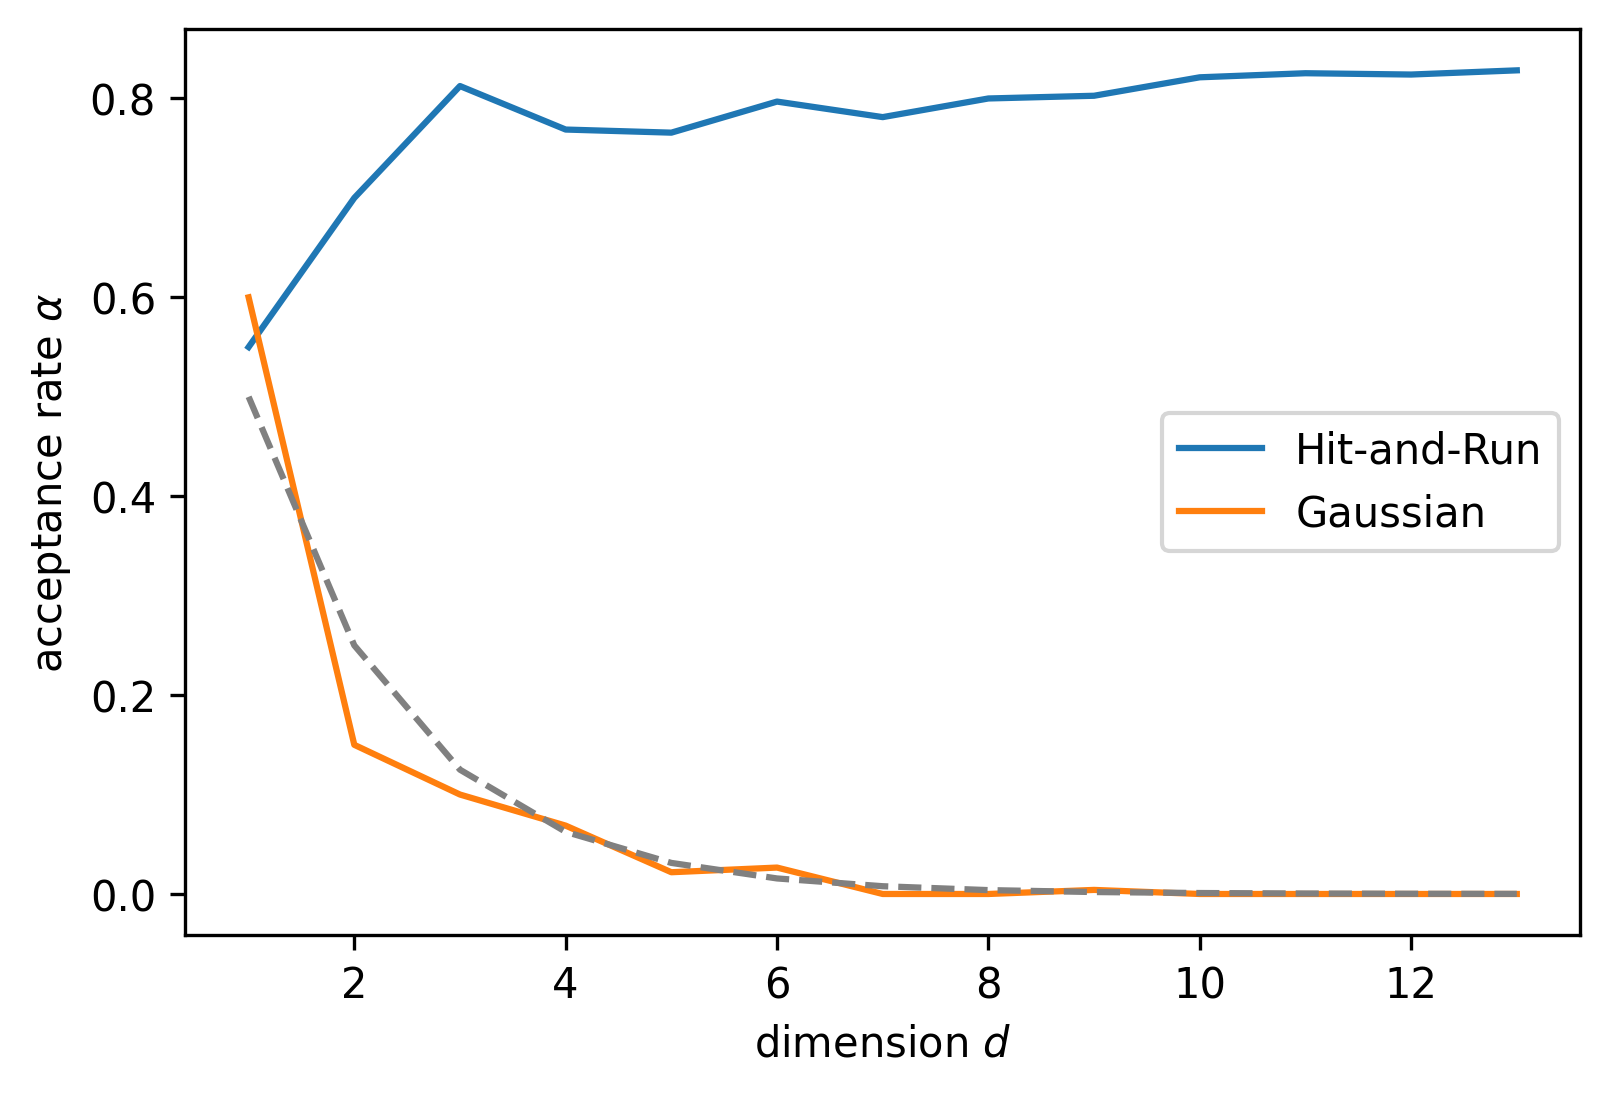

In [5]:
analytical = 1./2**dims

plt.figure(dpi=300)
plt.plot(dims, accrates, label=['Hit-and-Run', 'Gaussian'])
plt.plot(dims, analytical, linestyle='dashed', color='gray')

plt.xlabel(r'dimension $d$')
plt.ylabel(r'acceptance rate $\alpha$')

plt.legend()

plt.show()